<a href="https://colab.research.google.com/github/mohamedghaly1/Edge-Detection/blob/main/ImageEdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation**

In [ ]:
import numpy as np
from scipy.ndimage import convolve
from PIL import Image

def convo(image, k):
    k_s = k.shape[0]
    offset = k_s // 2
    res = np.zeros_like(image, dtype=np.float32)

    i = offset
    while i < image.shape[0] - offset:
        j = offset
        while j < image.shape[1] - offset:
            r = image[i-offset:i+offset+1, j-offset:j+offset+1]
            res[i, j] = np.sum(r * k)
            j += 1
        i += 1

    return res

def edge_detection(image, s, t):
    m_map = np.zeros_like(image, dtype=np.float32)
    s_map = np.zeros_like(image, dtype=np.int32)

    m_array = []

    for i in range(3, s + 1, 2):
        kernel_x = np.zeros((i, i))
        kernel_y = np.zeros((i, i))

        m = i // 2
        kernel_x[m, :] = 0
        kernel_x[:m, :] = -1
        kernel_x[m+1:, :] = 1

        kernel_y[:, m] = 0
        kernel_y[:, :m] = -1
        kernel_y[:, m+1:] = 1

        x_c = convo(image, kernel_x)
        y_c = convo(image, kernel_y)

        m = np.sqrt(x_c**2 + y_c**2) / i**2

        m_array.append(m)

    m_max = np.max(m_array, axis=0)

    for j in range(len(image)):
        for k in range(len(image[j])):
            if m_max[j, k] > t:
                max_index = np.argmax([m[j, k] for m in m_array])
                s_kernel = 3 + max_index * 2
                m_map[j, k] = m_max[j, k]
                s_map[j, k] = s_kernel
            else:
                m_map[j, k] = 0
                s_map[j, k] = 0

    return m_map, s_map


# **Testing**

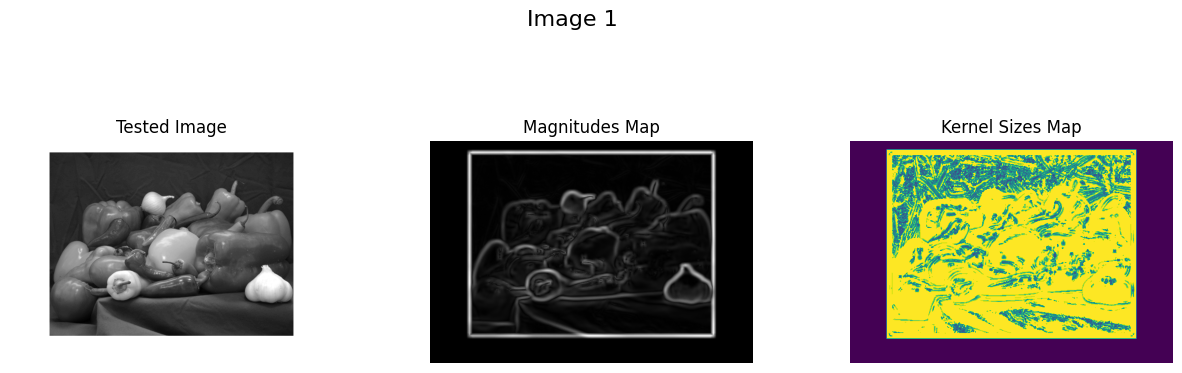

In [ ]:
import requests
from io import BytesIO
import matplotlib.pyplot as plt

urls = [
    "https://www.mathworks.com/help/examples/matlab/win64/DisplayGrayscaleRGBIndexedOrBinaryImageExample_02.png"
]

max_size = 13
threshold = 0.1

for idx, url in enumerate(urls, start=1):
    r = requests.get(url)
    im = Image.open(BytesIO(r.content)).convert('L')
    image = np.array(im, dtype=np.float32)

    magnitudes_map, kernel_sizes_map = edge_detection(image, max_size, threshold)

    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Image {idx}", fontsize=16)

    plt.subplot(1, 3, 1)
    plt.title("Tested Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Magnitudes Map")
    plt.imshow(magnitudes_map, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Kernel Sizes Map")
    plt.imshow(kernel_sizes_map, cmap='viridis')
    plt.axis('off')

    plt.subplots_adjust(wspace=0.3)
    plt.show()